<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [3]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [4]:
import numpy as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [6]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [7]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [8]:
# Tarea 1 Familiarizarse con el conjunto de datos
print("A continuación se describen las variables del conjunto de datos:",
"- CRIM: tasa de delincuencia per cápita por ciudad",
"- ZN: proporción de suelo residencial zonificado para lotes de más de 25.000 pies cuadrados.",
"- INDUS: proporción de acres comerciales no minoristas por localidad.",
"- CHAS: variable ficticia del río Charles (1 si el tracto linda con el río; 0 en caso contrario)",
"- NOX: concentración de óxidos nítricos (partes por 10 millones)",
"- RM: número medio de habitaciones por vivienda",
"- AGE: proporción de unidades ocupadas por sus propietarios construidas antes de 1940",
"- DIS: distancias ponderadas a cinco centros de empleo de Boston",
"- RAD: índice de accesibilidad a las autopistas radiales",
"- TAX: tasa del impuesto sobre bienes inmuebles de valor íntegro por 10.000 dólares",
"- PTRATIO: proporción alumnos-profesor por ciudad",
"- LSTAT: % más bajo de la población",
"- MEDV: valor medio de las viviendas ocupadas por sus propietarios en miles de dólares")


A continuación se describen las variables del conjunto de datos: - CRIM: tasa de delincuencia per cápita por ciudad - ZN: proporción de suelo residencial zonificado para lotes de más de 25.000 pies cuadrados. - INDUS: proporción de acres comerciales no minoristas por localidad. - CHAS: variable ficticia del río Charles (1 si el tracto linda con el río; 0 en caso contrario) - NOX: concentración de óxidos nítricos (partes por 10 millones) - RM: número medio de habitaciones por vivienda - EDAD: proporción de unidades ocupadas por sus propietarios construidas antes de 1940 - DIS: distancias ponderadas a cinco centros de empleo de Boston - RAD: índice de accesibilidad a las autopistas radiales - IMPUESTO: tasa del impuesto sobre bienes inmuebles de valor íntegro por 10.000 dólares - PTRATIO: proporción alumnos-profesor por ciudad - LSTAT: % más bajo de la población - MEDV: valor medio de las viviendas ocupadas por sus propietarios en miles de dólares


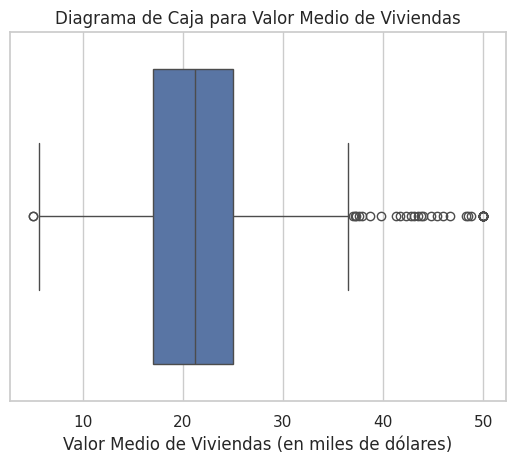

<class 'NameError'>: name 'plt' is not defined

In [18]:
# Tarea 4
sns.set(style="whitegrid")
ax = sns.boxplot(x='MEDV', data=boston_df)
ax.set(title='Diagrama de Caja para Valor Medio de Viviendas', xlabel='Valor Medio de Viviendas (en miles de dólares)')
plt.show()

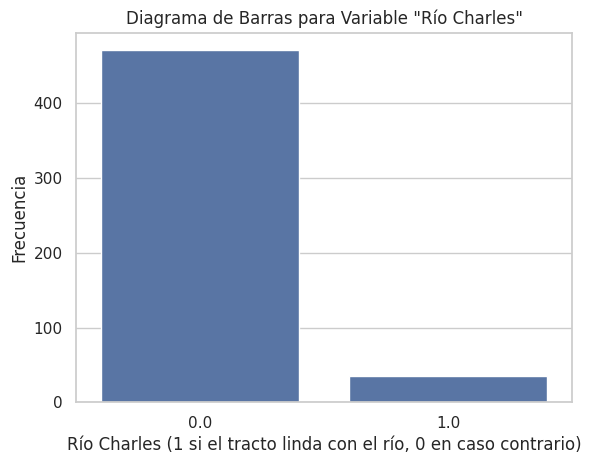

<class 'NameError'>: name 'plt' is not defined

In [12]:
# Tarea 4
sns.set(style="whitegrid")
ax = sns.countplot(x='CHAS', data=boston_df)
ax.set(title='Diagrama de Barras para Variable "Río Charles"', xlabel='Río Charles (1 si el tracto linda con el río, 0 en caso contrario)', ylabel='Frecuencia')
plt.show()

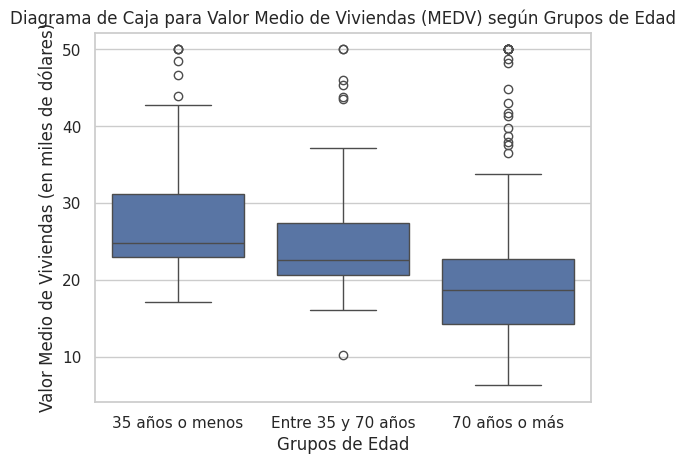

<class 'NameError'>: name 'plt' is not defined

In [13]:
# Tarea 4
bins = [0, 35, 70, boston_df['AGE'].max()]
labels = ['35 años o menos', 'Entre 35 y 70 años', '70 años o más']
boston_df['AGE_Groups'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)

sns.set(style="whitegrid")
ax = sns.boxplot(x='AGE_Groups', y='MEDV', data=boston_df)
ax.set(title='Diagrama de Caja para Valor Medio de Viviendas (MEDV) según Grupos de Edad', xlabel='Grupos de Edad', ylabel='Valor Medio de Viviendas (en miles de dólares)')
plt.show()

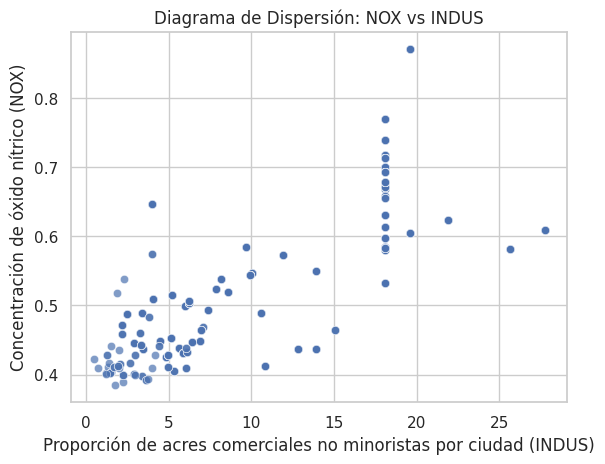

<class 'NameError'>: name 'plt' is not defined

In [14]:
# Tarea 4
sns.set(style="whitegrid")
ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_df, alpha=0.7)
ax.set(title='Diagrama de Dispersión: NOX vs INDUS', xlabel='Proporción de acres comerciales no minoristas por ciudad (INDUS)', ylabel='Concentración de óxido nítrico (NOX)')
plt.show()

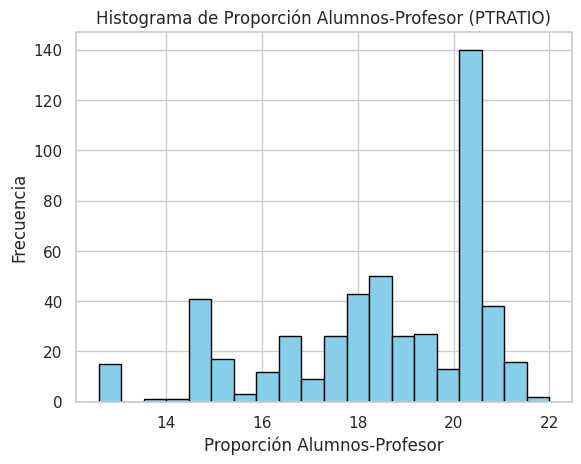

<class 'NameError'>: name 'plt' is not defined

In [15]:
# Tarea 4
sns.set(style="whitegrid")
pyplot.hist(boston_df['PTRATIO'], bins=20, color='skyblue', edgecolor='black')
pyplot.title('Histograma de Proporción Alumnos-Profesor (PTRATIO)')
pyplot.xlabel('Proporción Alumnos-Profesor')
pyplot.ylabel('Frecuencia')
plt.show()

In [17]:
# Tarea 5
# Hipótesis
# H_0: µ_1 = µ_2 ("No hay diferencia significativa en el valor medio de las viviendas delimitadas por el río Charles.")
# H_1: µ_1 ≠ µ_2 ("Existe una diferencia significativa en el valor medio de las viviendas delimitadas por el río Charles.")

# Trazar el histograma
ax = sns.distplot(data[data['CHAS'] == 1]['MEDV'], label='Río Charles', kde=True, color='red', hist_kws={"linewidth": 15, 'alpha': 1})
ax = sns.distplot(data[data['CHAS'] == 0]['MEDV'], label='Sin Río Charles', kde=True, color='blue', hist_kws={"linewidth": 15, 'alpha': 1})
ax.set(xlabel='Valor Medio de las Viviendas (MEDV)', ylabel='Frecuencia')
ax.legend()

# Prueba t para muestras independientes
t_statistic, p_value_ttest = stats.ttest_ind(
    data[data['CHAS'] == 1]['MEDV'],
    data[data['CHAS'] == 0]['MEDV'],
    equal_var=True  # asumiendo igualdad de varianza
)

# Conclusión de la prueba t
alpha = 0.05
if p_value_ttest < alpha:
    print("Dado que el p-valor es menor que 0.05, rechazamos la hipótesis nula. Hay pruebas suficientes de que existe una diferencia significativa en el valor medio de las viviendas delimitadas por el río Charles.")
else:
    print("No hay pruebas suficientes para rechazar la hipótesis nula. No se encuentra una diferencia estadística significativa en el valor medio de las viviendas delimitadas por el río Charles.")

# La prueba de hipótesis t para muestras independientes reveló que hay pruebas estadísticamente significativas (p < 0.05) para rechazar la hipótesis nula. Por lo tanto, concluimos que existe una diferencia significativa en el valor medio de las casas delimitadas por el río Charles en comparación con aquellas que no lo están.

<class 'NameError'>: name 'data' is not defined

In [19]:
# Tarea 5
# Pregunta 2
# H_0: µ_1 = µ_2 = … = µ_k ("no hay diferencia significativa en el valor medio de las casas entre las distintas proporciones de unidades ocupadas construidas antes de 1940.")
# H_1: µ_i ≠ µ_j ("existe al menos una diferencia significativa en el valor medio de las casas entre las distintas proporciones de unidades ocupadas construidas antes de 1940.")

# Pregunta 3
# H_0: ρ = 0 ("no hay correlación significativa entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas por ciudad.")
# H_1: ρ ≠ 0 ("existe una correlación significativa entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas por ciudad.")

# Pregunta 4
# H_0: β1 = 0 ("no hay impacto significativo de una distancia ponderada adicional a los cinco centros de empleo de Boston en el valor medio de las viviendas ocupadas por sus propietarios.")
# H_1: β1 ≠ 0 ("existe un impacto significativo de una distancia ponderada adicional a los cinco centros de empleo de Boston en el valor medio de las viviendas ocupadas por sus propietarios.")
